<font size=6><b>수익률(Return Rate)</b></font>

In [1]:
from pykrx import stock
from pykrx import bond
import FinanceDataReader as fdr

from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)



# Data Load

In [2]:
from pykrx import stock

In [3]:
# 20220103~20221229
df = stock.get_market_ohlcv("2022-01-01", "2022-12-31", "005930")[['종가','등락률']]
df.head()

,종가,등락률
날짜,,
2022-01-03,78600,0.38
2022-01-04,78700,0.13
2022-01-05,77400,-1.65
2022-01-06,76900,-0.65
2022-01-07,78300,1.82


In [4]:
df1 = df[df.index < '2022-02-01']
df1

,종가,등락률
날짜,,
2022-01-03,78600,0.38
2022-01-04,78700,0.13
2022-01-05,77400,-1.65
2022-01-06,76900,-0.65
2022-01-07,78300,1.82
2022-01-10,78000,-0.38
2022-01-11,78900,1.15
2022-01-12,78900,0.00
2022-01-13,77900,-1.27


# 연복리 수익률(CAGR)
* CAGR(Compound Annual Growth Rate)
* 투자 기간에 대한 투자 수익률
* $ (1+r)^N  = 기간수익률 $
* $ 연복리수익률(r) = 기간수익률^{1 \over N} -1  $

    * <font color=red><b>$단리 = 원금 × (1 + 년이율 × 기간) $
    * <font color=red><b>$복리 = 원금 × (1 + 년이율)^{기간} $  

## 누적 수익률

<table style="border-collapse: collapse; width: 70%;" border="1">
<tbody>
<tr>
<td style="width: 33.3333%;"><span style="font-family: 'Nanum Gothic';">기존</span></td>
<td style="width: 33.3333%;"><span style="font-family: 'Nanum Gothic';">10,000원</span></td>
<td style="width: 33.3333%;"><span style="font-family: 'Nanum Gothic';">0%</span></td>
</tr>
<tr>
<td style="width: 33.3333%;"><span style="font-family: 'Nanum Gothic';">첫째달</span></td>
<td style="width: 33.3333%;"><span style="font-family: 'Nanum Gothic';">11,000원</span></td>
<td style="width: 33.3333%;"><span style="font-family: 'Nanum Gothic';">10% 상승</span></td>
</tr>
<tr>
<td style="width: 33.3333%;"><span style="font-family: 'Nanum Gothic';">둘째달</span></td>
<td style="width: 33.3333%;"><span style="font-family: 'Nanum Gothic';">13,200원</span></td>
<td style="width: 33.3333%;"><span style="font-family: 'Nanum Gothic';">20% 상승</span></td>
</tr>
<tr>
<td style="width: 33.3333%;"><span style="font-family: 'Nanum Gothic';"><b>누적 수익률</b></span></td>
<td style="width: 33.3333%;">&nbsp;</td>
<td style="width: 33.3333%;"><span style="font-family: 'Nanum Gothic';">32% 상승</span></td>
</tr>
</tbody>
</table>

In [5]:
((11000-10000) / 10000) * 100  ,  ((13200-11000) / 11000) * 100

(10.0, 20.0)

In [6]:
temp = pd.DataFrame({"수익률":[0.1, 0.2]})
temp
temp['누적수익율'] = (1+temp['수익률']).cumprod() - 1
temp

,수익률,누적수익율
0,0.1,0.10
1,0.2,0.32


## 로그 수익률
* logA + logB = log(A*B)
* <font color=red><b> 로그 수익률은 합산(cumsum())
* 100 --> 150(50%)  --> 100(-33%)
<pre>
<font color=red size=5><b>
df1['수익률_chg'] = df1['종가'].pct_change()
r = df1['수익률_chg']
df1['누적수익률']  =( (1+r).cumprod() - 1 )
df1['로그수익률']  = np.log( 1+r) 
df1['누적로그수익률']  =  np.log( 1+r).cumsum()

In [7]:
(150-100)/100,  (100-150)/150

(0.5, -0.3333333333333333)

In [8]:
np.log((150-100)), np.log((150-100))*-1

(3.912023005428146, -3.912023005428146)

In [9]:
df1['수익률_chg'] = df1['종가'].pct_change()
r = df1['수익률_chg']
df1['누적수익률']  =( (1+r).cumprod() - 1 ) *100
df1['로그수익률']  = np.log( 1+r) 
df1['누적로그수익률']  =  np.log( 1+r).cumsum() *100
df1

,종가,등락률,수익률_chg,누적수익률,로그수익률,누적로그수익률
날짜,,,,,,
2022-01-03,78600,0.38,NaN,NaN,NaN,NaN
2022-01-04,78700,0.13,0.001272,0.127226,0.001271,0.127146
2022-01-05,77400,-1.65,-0.016518,-1.526718,-0.016656,-1.538492
2022-01-06,76900,-0.65,-0.006460,-2.162850,-0.006481,-2.186582
2022-01-07,78300,1.82,0.018205,-0.381679,0.018042,-0.382410
2022-01-10,78000,-0.38,-0.003831,-0.763359,-0.003839,-0.766287
2022-01-11,78900,1.15,0.011538,0.381679,0.011472,0.380953
2022-01-12,78900,0.00,0.000000,0.381679,0.000000,0.380953
2022-01-13,77900,-1.27,-0.012674,-0.890585,-0.012755,-0.894575


* 기간 수익률 = 최종금액 / 최초금액df

In [10]:
( (78600-73300) / 78600 ) * 100

6.743002544529262

* 수익률 플로팅

In [11]:
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

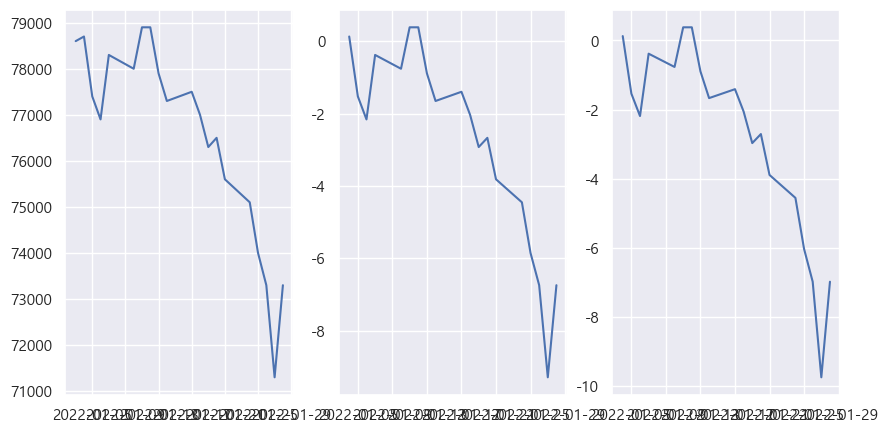

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
plt.plot(df1['종가'])

plt.subplot(1,3,2)
# (1+r).pct_change() -1
plt.plot( df1['누적수익률'])

plt.subplot(1,3,3)
# np.log(1 + r)
plt.plot(  df1['누적로그수익률'] )

plt.show()

* 연간 수익률이 10%이고 거래일이 30일인 경우, 복리 일간 수익률

In [13]:
annual_return = 0.1
trading_days = 30

daily_return          = ((1 + annual_return) ** (1/252)     ) - 1
compound_daily_return = ((1 + daily_return ) ** trading_days) - 1

print("복리 일간 수익률: {:.2%}".format(compound_daily_return))

복리 일간 수익률: 1.14%


# 월단위 리샘플링
* T S A Q W D h min

<table style="border-collapse: collapse; width: 70%; height: 459px;" border="1" data-ke-align="alignLeft">
<tbody>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">B</td>
<td style="width: 36.9767%; height: 17px;">영업일 기준 빈도</td>
<td style="width: 47.4419%;">Business day frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">C</td>
<td style="width: 36.9767%; height: 17px;">사용자 정의한 영업일 기준 빈도</td>
<td style="width: 47.4419%;">Custom Business day frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">D</td>
<td style="width: 36.9767%; height: 17px;">일 빈도</td>
<td style="width: 47.4419%;">Calendar day frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">W</td>
<td style="width: 36.9767%; height: 17px;">주간 빈도</td>
<td style="width: 47.4419%;">Weekly frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">M</td>
<td style="width: 36.9767%; height: 17px;">월 빈도</td>
<td style="width: 47.4419%;">Month end frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">SM</td>
<td style="width: 36.9767%; height: 17px;">15일 기준 빈도</td>
<td style="width: 47.4419%;">semi-month end frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">BM</td>
<td style="width: 36.9767%; height: 17px;">영업 종료 월 빈도</td>
<td style="width: 47.4419%;">business month end frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">CBM</td>
<td style="width: 36.9767%; height: 17px;">사용자 정의 기준 비지니스 우러 빈도</td>
<td style="width: 47.4419%;">cusom business month end frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">MS</td>
<td style="width: 36.9767%; height: 17px;">월 시작 빈도</td>
<td style="width: 47.4419%;">month start frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">SMS</td>
<td style="width: 36.9767%; height: 17px;">15일 기준으로 시작 기준인 빈도</td>
<td style="width: 47.4419%;">semi-month start frequncy (1st and 15th)</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">BMS</td>
<td style="width: 36.9767%; height: 17px;">영업 월 시작 기준 빈도</td>
<td style="width: 47.4419%;">Business month start frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">CBMS</td>
<td style="width: 36.9767%; height: 17px;">사용자 정의 비지니스 월 시작기준 빈도</td>
<td style="width: 47.4419%;">Custom Business month start frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">Q</td>
<td style="width: 36.9767%; height: 17px;">분기 기준</td>
<td style="width: 47.4419%;">quarter end freqency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">BQ</td>
<td style="width: 36.9767%; height: 17px;">사업 분기 빈도</td>
<td style="width: 47.4419%;">business quarter end frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">QS</td>
<td style="width: 36.9767%; height: 17px;">분기 시작 빈도</td>
<td style="width: 47.4419%;">business start frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">BQS</td>
<td style="width: 36.9767%; height: 17px;">비지니스 분기 시작 빈도</td>
<td style="width: 47.4419%;">business quarter start frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">A, Y</td>
<td style="width: 36.9767%; height: 17px;">연말 끝 기준 빈도</td>
<td style="width: 47.4419%;">year end frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">BA, BY</td>
<td style="width: 36.9767%; height: 17px;">사업 연도</td>
<td style="width: 47.4419%;">business year end frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">AS, YS</td>
<td style="width: 36.9767%; height: 17px;">연도 시작 빈도</td>
<td style="width: 47.4419%;">year start frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">BAS, BYS</td>
<td style="width: 36.9767%; height: 17px;">사업 연도 시작 빈도</td>
<td style="width: 47.4419%;">business year start frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">BH</td>
<td style="width: 36.9767%; height: 17px;">영업 시간 빈도</td>
<td style="width: 47.4419%;">business hour frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">H</td>
<td style="width: 36.9767%; height: 17px;">시간 당 빈도</td>
<td style="width: 47.4419%;">hourly frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">T, min</td>
<td style="width: 36.9767%; height: 17px;">분 당 빈도</td>
<td style="width: 47.4419%;">minutely frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">S</td>
<td style="width: 36.9767%; height: 17px;">초 당 빈도</td>
<td style="width: 47.4419%;">secondly frequency</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">L, ms</td>
<td style="width: 36.9767%; height: 17px;">밀리초 당 빈도</td>
<td style="width: 47.4419%;">miliseconds</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">U, us</td>
<td style="width: 36.9767%; height: 17px;">마이크로 초 기준 빈도</td>
<td style="width: 47.4419%;">microseconds</td>
</tr>
<tr style="height: 17px;">
<td style="width: 15.5814%; height: 17px;">N</td>
<td style="width: 36.9767%; height: 17px;">나노 초 빈도</td>
<td style="width: 47.4419%;">nanoseconds</td>
</tr>
</tbody>
</table>

In [14]:
dfm = df.resample(rule='M').mean()
dfm

,종가,등락률
날짜,,
2022-01-31,76540.000000,-0.322500
2022-02-28,73688.888889,-0.085556
2022-03-31,70409.523810,-0.161429
2022-04-30,67395.238095,-0.142857
2022-05-31,66852.380952,0.006667
2022-06-30,61125.000000,-0.828000
2022-07-31,59547.619048,0.367619
2022-08-31,60272.727273,-0.121364
2022-09-30,55595.000000,-0.573000


In [15]:
top10_df = pd.read_csv("./datasets/kospi_top10.csv")
top10_df.head()

,날짜,삼성전자,LG에너지솔루션,SK하이닉스,삼성바이오로직스,삼성SDI,LG화학,삼성전자우,현대차,POSCO홀딩스,기아
0,2023-04-03,63100,586000,87200,778000,745000,712000,53800,183600,392000,81200
1,2023-04-04,63600,575000,84500,788000,726000,722000,53700,183800,367000,80100
2,2023-04-05,63900,588000,84600,788000,778000,732000,53800,186700,373500,81300
3,2023-04-06,62300,580000,83800,805000,745000,716000,53100,185100,362500,81000
4,2023-04-07,65000,580000,89100,796000,738000,714000,54800,185100,369500,80100


In [16]:
df = pd.DataFrame({'날짜': ['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31'],
                   '종가': [1000, 1100, 1200, 1300, 1400]})

df['날짜'] = pd.to_datetime(df['날짜'])
df['월별수익률'] = df['종가'].pct_change()
df['월간복리수익률'] = (1 + df['월별수익률']).cumprod() - 1
print(df)

          날짜    종가     월별수익률  월간복리수익률
0 2022-01-31  1000       NaN      NaN
1 2022-02-28  1100  0.100000      0.1
2 2022-03-31  1200  0.090909      0.2
3 2022-04-30  1300  0.083333      0.3
4 2022-05-31  1400  0.076923      0.4


In [17]:
pd.date_range('2022-01-01', periods=5,  freq='D')

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05'],
              dtype='datetime64[ns]', freq='D')

In [18]:
import pandas as pd

df = pd.DataFrame({'날짜': pd.date_range('2022-01-01', periods=5,  freq='D'),
                   '종가': [1000, 1100, 1200, 1300, 1400]})

closing_prices = df['종가']

# 첫 번째 날짜의 종가를 시작 가격으로 설정
start_price = df.iloc[0]['종가']
# 복리 일간 수익률
df['daily_returns'] = df['종가'].pct_change()

df['cumulative_returns'] = (1 + df['daily_returns']).cumprod()

# 지수화(누적수익률) : 시작 가격으로 나누어 초기 누적 수익률을 1로 설정
df['cumulative_returns'] = df['cumulative_returns'] / (df.iloc[0]['종가'] / 1)
df

,날짜,종가,daily_returns,cumulative_returns
0,2022-01-01,1000,NaN,NaN
1,2022-01-02,1100,0.100000,0.0011
2,2022-01-03,1200,0.090909,0.0012
3,2022-01-04,1300,0.083333,0.0013
4,2022-01-05,1400,0.076923,0.0014


# 포트폴리오

In [19]:
pdf = pd.read_csv("./datasets/kospi_top10.csv") #.iloc[:, [1,2,10]]
pdf = pdf.set_index('날짜')
pdf = pdf.iloc[:, [0,1,9]]
pdf.head()

,삼성전자,LG에너지솔루션,기아
날짜,,,
2023-04-03,63100,586000,81200
2023-04-04,63600,575000,80100
2023-04-05,63900,588000,81300
2023-04-06,62300,580000,81000
2023-04-07,65000,580000,80100


## 기대수익률(expected return)
* <font color=red><b>포트폴리오의 각 자산에 대한 예상 수익률의 기하평균 --> ln(x)의 평균
* 과거 수익률을 바탕으로 미래 수익률을 추정한 값
* 일반적으로 로그 수익률을 많이 활용
    * $로그수익률=\ln (\frac{나중\, \, 주가}{처음\, \, 주가}) = np.log(1+r)$
    * r = (현재가격 - 이전가격) / 이전가격

* 기하평균 : f(n) = ln x일 때의 일반화된 f-평균
<img width=400 src="http://www.dentalnews.or.kr/data/photos/20210414/art_16178427616153_62e095.jpg">

### 자산별 기대 수익률 추정

In [20]:
ret_df = np.log(1+ pdf.pct_change())
ret_df.dropna(inplace=True, axis=0)
ret_df

,삼성전자,LG에너지솔루션,기아
날짜,,,
2023-04-04,0.007893,-0.018950,-0.013639
2023-04-05,0.004706,0.022357,0.014870
2023-04-06,-0.025358,-0.013699,-0.003697
2023-04-07,0.042426,0.000000,-0.011173
2023-04-10,0.010712,0.027213,0.011173
2023-04-11,0.003040,0.023218,0.048202
2023-04-12,0.001516,-0.033336,0.012858
2023-04-13,0.001514,0.015139,0.005790
2023-04-14,-0.015244,-0.008382,-0.015125


* <font color=red><b>일별 기대수익률

In [21]:
ret_df.mean()

삼성전자        0.000493
LG에너지솔루션   -0.003849
기아          0.004024
dtype: float64

* <font color=red><b>년간 기대수익률</b></font>
    * 삼성전자는 1년에 평균적으로 12.4%의 로그 수익률을 기대할 수 있다.

In [22]:
(ret_df.mean() * 252) * 100

삼성전자         12.431004
LG에너지솔루션    -96.996344
기아          101.405695
dtype: float64

### 포트폴리오 기대수익률
* v=[1,2,3] 이고 w=[4,5,6]
* v.dot(w) -->  $v\, ⋅\, w=1\times 4+2\times 5+3\times 6$

* <font color=red><b> 자산별 년간 기대 수익률

In [23]:
er = (ret_df.mean() * 252).values
er

array([ 0.12431004, -0.96996344,  1.01405695])

* <font color=red><b> 자산별 가중치

In [24]:
w = [0.3, 0.1, 0.6]
w

[0.3, 0.1, 0.6]

* <font color=red><b> 포트폴리오 가중치 적용 - 년간 기대 수익률

In [25]:
portpolio_er = np.dot(er, w)
portpolio_er

0.5487308384940474

In [26]:
np.dot(er, [0.3, 0.6, 0.1])

-0.4432793585016894

## 변동성 = 위험(risk)
* <font color=red><b>자산별 기대수익률의 표준편차 == 수익률의 변동성(volatility)</b></font>
* 편차(평균으로부터 떨어진 정도) --> 기대수익률의 분산
    * 분산 : 편차 제곱 합의 평균
    * 표준편차 : 루트(분산) 
* 편차가 크다 = 위험이 크다

### 자산별 위험 추정
* 기대수익률df.<font color=red><b>std()</b></font> : for for.. 비추
* 기대수익률df.<font color=red><b>cov()</b></font> : 내적

### 방법1) std() 사용

* <font color=red><b>일간 변동성(리스크)

In [27]:
ret_df.std() 

삼성전자        0.015577
LG에너지솔루션    0.017993
기아          0.019738
dtype: float64

* <font color=red><b>년간 변동성(리스크)

In [28]:
(ret_df.std() * np.sqrt(252))  * 100

삼성전자        24.727425
LG에너지솔루션    28.562415
기아          31.332530
dtype: float64

### 방법2) cov() 사용

### 포트폴리오 위험

$\left[\begin{matrix}VAR[S_1]&COV[S_1,S_2]&\cdots &COV[S_1,S_N]\\COV[S_2,S_1]&VAR[S_2]&\cdots &COV[S_2,S_N]\\\vdots &\vdots &\ddots &\vdots \\COV[S_N,S_1]&COV[S_N,S_2]&\cdots &VAR[S_N]\end{matrix}\right]$

<font color=red><b>$\sigma _p^2=\omega \ C\ \omega ^{\top }$

In [29]:
cov_df = ret_df.cov()
cov_df

,삼성전자,LG에너지솔루션,기아
삼성전자,0.000243,0.000099,-0.000053
LG에너지솔루션,0.000099,0.000324,0.000065
기아,-0.000053,0.000065,0.000390


In [30]:
np.sqrt(cov_df.iloc[0,0])*100, np.sqrt(cov_df.iloc[1,1])*100, np.sqrt(cov_df.iloc[2,2])*100

(1.5576813543146775, 1.7992630211363294, 1.9737638504234662)

In [31]:
(ret_df.std()*100).values

array([1.55768135, 1.79926302, 1.97376385])

* <font color=red><b>공분산 행렬을 이용한 년간 리스크

In [32]:
ret_df.cov()*252

,삼성전자,LG에너지솔루션,기아
삼성전자,0.061145,0.024989,-0.013294
LG에너지솔루션,0.024989,0.081581,0.016403
기아,-0.013294,0.016403,0.098173


In [33]:
np.sqrt(0.061145), (ret_df.std() * np.sqrt(252))  * 100

(0.247275150389197,
 삼성전자        24.727425
 LG에너지솔루션    28.562415
 기아          31.332530
 dtype: float64)

* <font color=red><b>포트폴리오 가중치 적용 - 년간 리스크
    * <font color=red><b>$\sigma _p^2=\omega \ C\ \omega ^{\top }$

In [34]:
# annual_cov_matrix 
C = (ret_df.cov() * 252).values
C

array([[ 0.06114455,  0.02498889, -0.0132935 ],
       [ 0.02498889,  0.08158115,  0.01640269],
       [-0.0132935 ,  0.01640269,  0.09817274]])

In [35]:
w = np.array([0.3, 0.1, 0.6])
w

array([0.3, 0.1, 0.6])

* <font color=red><b>포트폴리오 최종 Risk

In [36]:
portfolio_var = np.dot( np.dot(w, C) , w.T) 
portfolio_std = np.sqrt(portfolio_var)
portfolio_std

0.20085567694798676

* <b>종목별 상관계수</b></font>
    * <font color=red><b>음의 상관계수</b></font>가 큰 종목들을 하나의 포트폴리오에 구성
    * <font color=red><b>헷지(hedge)</b></font> : 울타리, 대비책
    * 자산투자의 위험 분산 (투자한 자산의 하락에 대비하여 이를 상쇄하는 행위)

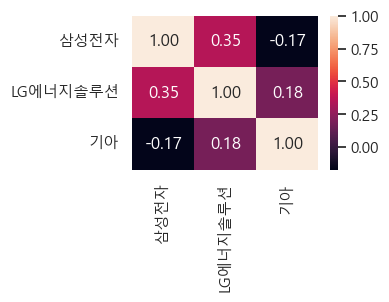

In [37]:
plt.figure(figsize=(3,2))
sns.heatmap(ret_df.corr(), fmt="0.2f", annot=True)
plt.show()

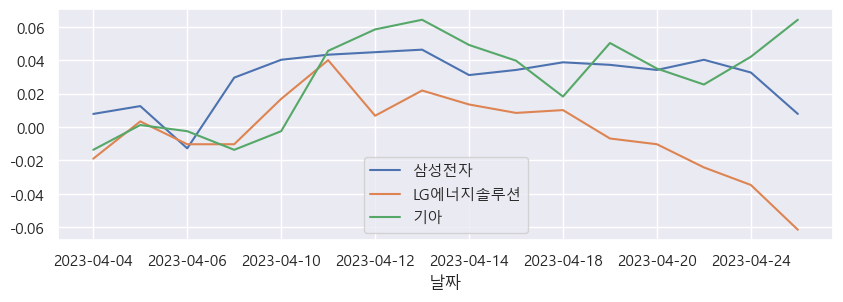

In [38]:
ret_df.cumsum().plot(figsize=(10,3))
plt.legend()
plt.show()

# 효율적 투자 전략
* <font color=red><b>샤프지수(Sharpe index) </b></font>
    * (기대수익률 - 벤치마크수익률)의 기대값을 (기대수익률 - 벤치마크수익률)의 표준편차로 나눈 것
    * <b>(수익률-무위험수익률) / 리스크  --> <font color=red>수익률/표준편차</font></b>
    * <font color=red><b>샤프지수가 높다 == 수익률이 높다 == 위험이 적다 == 더 좋은 포트폴리오

In [39]:
annual_ret = ret_df.mean()   * 252
annual_cov = ret_df.cov() * 252

port_ret     = [] 
port_risk    = [] 
port_weights = [] 
port_sharp   = [] 
stocks = ret_df.columns

for _ in range(20000): 
    weights = np.random.random(len(stocks)) 
    weights = weights / np.sum(weights) 

    #------------------- 수익률, 리스크(편차), 샤프지수 -----------------------
    returns = np.dot(weights, annual_ret) 
    risk    = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights))) 
    sharp   =  returns / risk
    
    port_ret.append(returns) 
    port_risk.append(risk) 
    port_weights.append(np.round(weights,2)) 
    port_sharp.append(sharp) 
    
    
port_dic = {'Return': port_ret, 'Risk': port_risk, 'Sharp':port_sharp ,'Weight': port_weights} 
df = pd.DataFrame(port_dic) 
print(f'{stocks.values}')
df.head()

['삼성전자' 'LG에너지솔루션' '기아']


,Return,Risk,Sharp,Weight
0,0.011538,0.182266,0.063301,"[0.34, 0.35, 0.31]"
1,0.013474,0.179341,0.075128,"[0.43, 0.31, 0.26]"
2,0.196874,0.195710,1.005945,"[0.76, 0.07, 0.17]"
3,-0.194273,0.215983,-0.899482,"[0.09, 0.57, 0.34]"
4,0.380727,0.244896,1.554645,"[0.01, 0.32, 0.68]"


In [40]:
# 샤프치수   최대 포트
sharp_max = df[df['Sharp'] == df['Sharp'].max()]['Sharp'].values[0]

# 위험리스크 최소 포트
risk_min  = df[df['Risk'] == df['Risk'].min()] ['Risk'].values[0]
# 수익률     최대 포트
return_max = df[df['Return'] == df['Return'].max()] ['Return'].values[0]


#           Risk    Return
# 6274  0.223144  0.760134
#            Risk    Return
# 12088  0.173086  0.283057
#           Risk    Return
# 1667  0.306557  0.982149

print(f'Expected annual return: {return_max:.4f}')
print(f'Annual volatility: {risk_min:.4f}')
print(f'Sharpe Ratio: {sharp_max:.4f}')

Expected annual return: 1.0032
Annual volatility: 0.1731
Sharpe Ratio: 3.3957


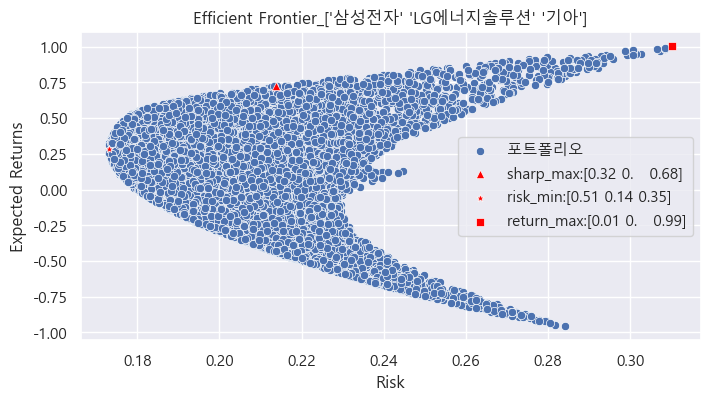

In [41]:
# 샤프치수   최대 포트
sharp_max = df[df['Sharp'] == df['Sharp'].max()]
# 위험리스크 최소 포트
risk_min  = df[df['Risk'] == df['Risk'].min()] 
# 수익률     최대 포트
return_max = df[df['Return'] == df['Return'].max()] 

plt.figure(figsize=(8,4))
sns.scatterplot(data=df        , x='Risk', y='Return'                     , label=f"포트폴리오")
sns.scatterplot(data=sharp_max , x='Risk', y='Return', marker="^", c='red', label=f"sharp_max:{sharp_max['Weight'].values[0]}")
sns.scatterplot(data=risk_min  , x='Risk', y='Return', marker="*", c='red', label=f"risk_min:{risk_min['Weight'].values[0]}")
sns.scatterplot(data=return_max, x='Risk', y='Return', marker="s", c='red', label=f"return_max:{return_max['Weight'].values[0]}")

plt.title(f'Efficient Frontier_{stocks.values}') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 